In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [30]:
losses = {}

for filename in os.listdir('loss'):
    losses[filename] = np.load('loss/' + filename)

# # Find the maximum number of iterations
# max_iter = 0
# for key in losses:
#     max_iter = max(max_iter, len(losses[key]))

# # Pad the losses with last value
# for key in losses:
#     losses[key] = np.pad(losses[key], (0, max_iter - len(losses[key])), 'edge')


# These models were trained with weights [1, 1], hence divide by 2 to make them comparable with the others as softadapt make weights sum to 1.
losses['loss_ns-upinn-with-pressuredata-plain-softadapt00-2000.npy'] /= 2
losses['loss_ns-upinn-with-pressuredata-plain40-2000.npy'] /= 2
losses['loss_ns-upinn-with-pressuredata-resnet20-2000.npy'] /= 2
losses['loss_ns-upinn-with-pressuredata-resnet40-2000.npy'] /= 2

In [31]:
names = [
    r'SoftAdapt($\beta=0.0$)',
    r'SoftAdapt($\beta=0.0$) with lossweight',
    r'SoftAdapt($\beta=0.1$)',
    r'SoftAdapt($\beta=0.1$) with lossweight',
    r'SoftAdapt($\beta=0.2$)',
    r'SoftAdapt($\beta=0.2$) with lossweight',
    r'SoftAdapt($\beta=0.5$)',
    r'SoftAdapt($\beta=0.5$) with lossweight',
    r'SoftAdapt($\beta=1.0$)',
    r'SoftAdapt($\beta=1.0$) with lossweight',
]

softadapt = [
    'loss_ns-upinn-with-pressuredata-plain-softadapt00-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain-softadapt00-lw-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain-softadapt01-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain-softadapt01-lw-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain-softadapt02-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain-softadapt02-lw-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain-softadapt05-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain-softadapt05-lw-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain-softadapt10-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain-softadapt10-lw-2000.npy',
    ]



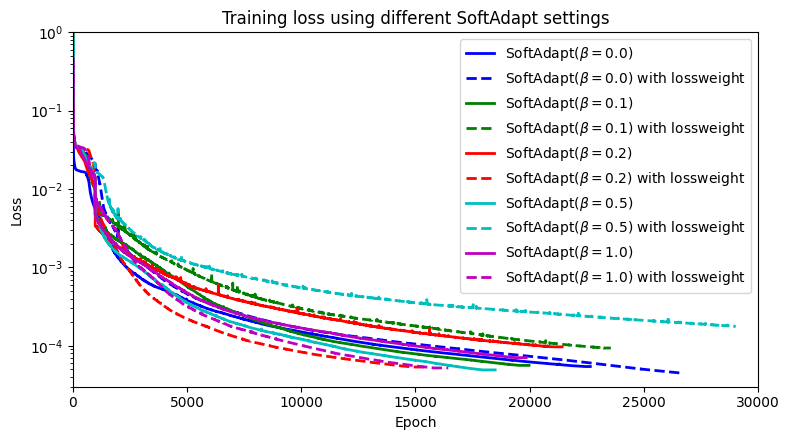

In [32]:
colors = [
    'b', 'b', 'g', 'g', 'r', 'r', 'c', 'c', 'm', 'm'
]

plt.figure( figsize=(8, 4.5) )
for i, key in enumerate(softadapt):
    if 'lw' in key:
        plt.plot(losses[key], linestyle='--', color=colors[i], linewidth=2, label=names[i])
    else:
        plt.plot(losses[key], color=colors[i], linewidth=2, label=names[i])
plt.legend()
plt.yscale('log')
plt.xlim(0, 30000)
plt.ylim(0.00003, 1.0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss using different SoftAdapt settings')
plt.tight_layout()
plt.savefig('gfx/ns-upinn-softadapt-loss.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [33]:
arch = [
    'loss_ns-upinn-with-pressuredata-plain-softadapt00-2000.npy',
    # 'loss_ns-upinn-with-pressuredata-kan-adam-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain40-2000.npy',
    'loss_ns-upinn-with-pressuredata-resnet20-2000.npy',
    'loss_ns-upinn-with-pressuredata-resnet40-2000.npy',
    'loss_ns-upinn-with-pressuredata-u_block.npy',
    'loss_ns-upinn-with-pressuredata-u_block-F_block.npy',
    'loss_ns-upinn-with-pressuredata-plain-softadapt02-lw-2000.npy',
    'loss_ns-upinn-with-pressuredata-plain40-softadapt02-lw-2000.npy',
    'loss_ns-upinn-with-pressuredata-resnet40-softadapt02-lw-2000.npy'
]

names1 = [
    r'FNN [20]*8',
    r'FNN [40]*8',
    r'ResNet [20]*2*4',
    r'ResNet [40]*2*4',
    r'u-block [20]*8',
    r'u-block [20]*8, F-block [20]*8',
    r'FNN [20]*8 with SoftAdapt($\beta=0.2$) and lossweight',
    r'FNN [40]*8 with SoftAdapt($\beta=0.2$) and lossweight',
    r'ResNet [40]*2*4 with SoftAdapt($\beta=0.2$) and lossweight',
    # r'u-block [20]*8 with SoftAdapt($\beta=0.2$) and lossweight',
]

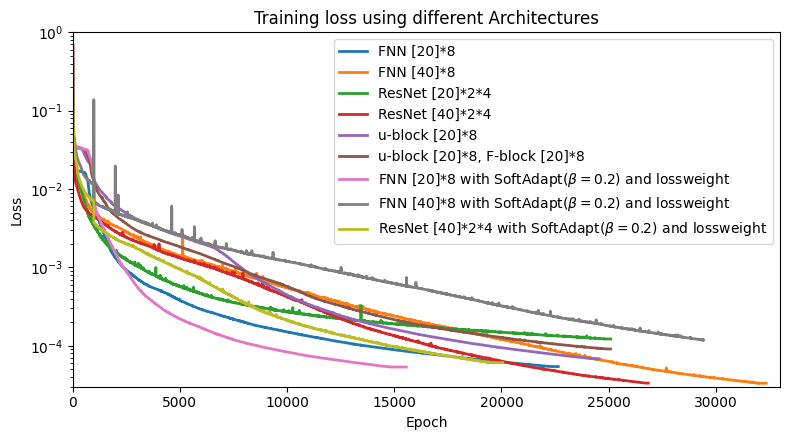

In [34]:
colors = [
    'b', 'b', 'g', 'g', 'r', 'r', 'c', 'c', 'm', 'm'
]

plt.figure( figsize=(8, 4.5) )
for i, key in enumerate(arch):

    plt.plot(np.array(losses[key]), label=names1[i], linewidth=2)


plt.legend()
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 33000)
plt.ylim(0.00003, 1)
plt.title('Training loss using different Architectures')
plt.tight_layout()
plt.savefig('gfx/ns-upinn-architecture-loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [35]:
# # Rename file beginning with nv to ns
# for filename in os.listdir('loss'):
#     if filename.startswith('loss_nv'):
#         os.rename('loss/' + filename, 'loss/' + filename.replace('loss_nv', 'loss_ns'))

NameError: name 'model' is not defined

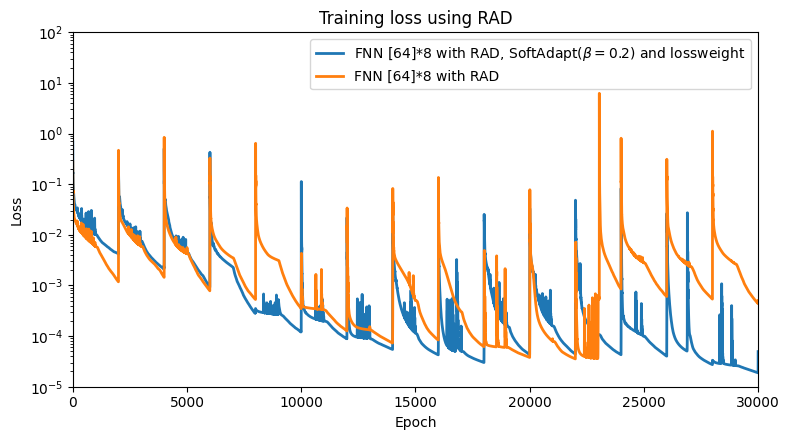

In [41]:
rads = [
    'loss_ns-upinn-with-pressuredata-plain64-softadapt02-lw-RAD-alt-2000-20000.npy',
    'loss_ns-upinn-with-pressuredata-FNN64-RAD-alt-2000.npy',
]

losses['loss_ns-upinn-with-pressuredata-FNN64-RAD-alt-2000.npy'] /= 2

names2 = [
    r'FNN [64]*8 with RAD, SoftAdapt($\beta=0.2$) and lossweight',
    r'FNN [64]*8 with RAD',
]

plt.figure( figsize=(8, 4.5) )
for i, key in enumerate(rads):
    plt.plot(np.array(losses[key]), label=names2[i], linewidth=2)

plt.legend()
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 30000)
plt.ylim(0.00001, 100)
plt.title('Training loss using RAD')
plt.tight_layout()
# plt.savefig('gfx/ns-upinn-rad-loss.pdf', format='pdf', bbox_inches='tight')
plt.show()


